# OCI Jupyter 기본 설정

## OCI CLI 설정

In [1]:
%setup_jupyter

- 아래 공개키를 OCI 사용자 API 키로 등록하시기 바랍니다. 

Finger Print: bf:c8:bf:9b:21:61:aa:12:cc:cd:c7:3a:00:59:99:6a

public key

-----BEGIN PUBLIC KEY-----
MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA7sNQ81YaQVzN4SaixTK2
npC/PraSSOeFtJzdukpO5AyH9JeP/Iq6jRof2bDGAagLjNgpjlPhdKhMKZAjHVTR
Luj/wvV6oaNlbVm2UPQ6Cez7biOIgz1PYNgXfpSuBTh45KUte72ZyfEs773UaC1g
0h87NRUEBf8GfAws9cRcBCPHtyTFuePKBI885MEFX2mS30GwX8FUxv3/2qgi9ZwC
9j/U0vCDyPuTUCnjFuU30TYfpyknyCQCkwiKlVZx2ZW39ghQ+EkhJHE9XAKg0gK3
CdUP/U/YReAWqspxV9Utg3pmQHJHAGOjun1mQgYO5/uo8px9K1g9CqWw9QVKOCEn
VwIDAQAB
-----END PUBLIC KEY-----


- 위 공개키를 OCI 계정에 등록했면, 
- 새로운 Cell에서 다음 명령을 실행하여 설정 상태를 확인해 주세요.
!oci os ns get


### OCI CLI  설정 테스트

In [2]:
!oci os ns get

{
  "data": "cnrbwbf6ge9b"
}


## ADW 설정 & 접속

### Compartment OCID 목록

In [5]:
%list_compartments

,Name,Compartment ID
0,root,ocid1.tenancy.oc1..aaaaaaaaedyevlzjq3t3m4xrz3hgobxb2ywnie7cdonwb3xnwmcuuwsybu2q
1,koscom,ocid1.compartment.oc1..aaaaaaaauxnklmmzj2suqagp2ajnfwsuz6gidik2uclzbr6wl7wky2s4oxaq
2,KOSCOM1,ocid1.compartment.oc1..aaaaaaaaesxfhjvauvr7uwnhz6gn7sc3fv45sznihgy4popxukrr3a5pliaq
3,koscom2,ocid1.compartment.oc1..aaaaaaaay4m4hpj7f4tioxcw2eob5crc6lj3otioe5do3t7bjeqxi647ziaa
4,ManagedCompartmentForPaaS,ocid1.compartment.oc1..aaaaaaaapqd4k4nnzxruae4eg4dzi6ifrem5e53dhmzapz7aijr4h7yxx3ia
5,tf_lab,ocid1.compartment.oc1..aaaaaaaat4w6d3u22djuufvgrlmqlkee5rrty5m2wh2j3s2jnw6gnkcpj7uq
6,tw,ocid1.compartment.oc1..aaaaaaaad7isfhhw3taf6jgkkbltuyoakuig5akeyqkr3ntdttvld47ifdxq


## Autonomous DB 조회

In [12]:
%%list_adb
compartment_id = ocid1.compartment.oc1..aaaaaaaad7isfhhw3taf6jgkkbltuyoakuig5akeyqkr3ntdttvld47ifdxq

,DB Name,Workload,CPU,Storage(TB),Status,Auto Scaling,ID
0,aaaa,DW,1,1,AVAILABLE,True,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljr6dut4ev6dutpwjppweokm355b7saorhovbfb22uqaeyfo2qgk4gq
1,tw,DW,1,1,AVAILABLE,False,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrg2dpndo5hpla55opwixek36vdsaphbxi5lvgctczcdoxgqsfedca
2,autoadw2,DW,1,1,AVAILABLE,False,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrjqkcfqxohkpxhazo3qv5kf2lvbuat62lddakb2ubdqb4t7ze6ovq
3,developer,DW,1,1,TERMINATED,True,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrw7vuoiqeqjm42b32n3absgt2vvqc4pyjqrlu5tn6rcuo7ftcyrjq


In [14]:
%%create_adb
compartment_ocid = ocid1.compartment.oc1..aaaaaaaad7isfhhw3taf6jgkkbltuyoakuig5akeyqkr3ntdttvld47ifdxq
cpu = 1
storage = 1
db_name = demoadw
display_name = demoadw
workload = DW
password = Welcome123456
auto_scaling = False

ADB 인스턴스 생성 시작:demoadw


In [16]:
%%list_adb
compartment_id = ocid1.compartment.oc1..aaaaaaaad7isfhhw3taf6jgkkbltuyoakuig5akeyqkr3ntdttvld47ifdxq

,DB Name,Workload,CPU,Storage(TB),Status,Auto Scaling,ID
0,aaaa,DW,1,1,AVAILABLE,True,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljr6dut4ev6dutpwjppweokm355b7saorhovbfb22uqaeyfo2qgk4gq
1,tw,DW,1,1,AVAILABLE,False,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrg2dpndo5hpla55opwixek36vdsaphbxi5lvgctczcdoxgqsfedca
2,autoadw2,DW,1,1,AVAILABLE,False,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrjqkcfqxohkpxhazo3qv5kf2lvbuat62lddakb2ubdqb4t7ze6ovq
3,developer,DW,1,1,TERMINATED,True,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrw7vuoiqeqjm42b32n3absgt2vvqc4pyjqrlu5tn6rcuo7ftcyrjq
4,demoadw,DW,1,1,AVAILABLE,True,ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrxankvmehiwc6ivvsnebrq4whvnv64bh7mg63szft2hamufrhqubq


In [3]:
%%change_adb
adb_ocid = ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrxankvmehiwc6ivvsnebrq4whvnv64bh7mg63szft2hamufrhqubq
cpu = 2
storage = 1

ADB 인스턴스 변경 시작:demoadw


###  Autonomous DB 접속 정보 설정

In [4]:
%%config_db_info
adb_id = ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrg2dpndo5hpla55opwixek36vdsaphbxi5lvgctczcdoxgqsfedca
user = admin
password = Welcome123456
profile = medium

- 설정 파일(/root/ipython/config/adb.ini) 저장 완료.
- 현재 Cell은 중요 정보가 포함되어 있습니다.
- 현재 Cell은 삭제해 주세요.


### Autonomous Database 선택

In [5]:
%%use_adb
adb_ocid = ocid1.autonomousdatabase.oc1.ap-seoul-1.abuwgljrg2dpndo5hpla55opwixek36vdsaphbxi5lvgctczcdoxgqsfedca

- Database(tw) 설정 완료!!!
Connected: admin@None
Connected with ADW.


/usr/local/lib/python3.6/dist-packages/sqlalchemy/dialects/oracle/base.py:1316: SAWarning: Oracle version (18, 4, 0, 0, 0) is known to have a maximum identifier length of 128, rather than the historical default of 30. SQLAlchemy 1.4 will use 128 for this database; please set max_identifier_length=128 in create_engine() in order to test the application with this new length, or set to 30 in order to assure that 30 continues to be used.  In particular, pay close attention to the behavior of database migrations as dynamically generated names may change. See the section 'Max Identifier Lengths' in the SQLAlchemy Oracle dialect documentation for background.
  % ((self.server_version_info,))


### 테스트 쿼리 

In [21]:
%%sql
SELECT sysdate from DUAL

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


sysdate
2019-10-22 01:27:13


# DataSet loading

## Boston House Pricing

In [22]:
from sqlalchemy import create_engine
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np

boston = load_boston()
features=np.append(boston.feature_names,np.array(['medv']))
df = pd.DataFrame(np.c_[boston['data'], boston['target']], columns=features)

conn_str=os.environ['PY_CONNECTION_STR']
engine = create_engine(conn_str)

df.to_sql('bostonhousing', engine, index=False, if_exists='replace')

In [23]:
%%sql

select * from bostonhousing
FETCH FIRST 10 ROWS ONLY

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2
0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.1,18.9


## Iris 

In [24]:
from sqlalchemy import create_engine
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
features=np.append(iris.feature_names,np.array(['target']))
df = pd.DataFrame(data = np.c_[iris['data'],iris['target']], columns=features)

conn_str=os.environ['PY_CONNECTION_STR']
engine = create_engine(conn_str)

df.to_sql('iris', engine, index=False, if_exists='replace')

In [25]:
%%sql

select * from iris
FETCH FIRST 10 ROWS ONLY

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
4.6,3.6,1.0,0.2,0.0
5.1,2.5,3.0,1.1,1.0
6.0,2.2,4.0,1.0,1.0
5.8,2.6,4.0,1.2,1.0
5.5,2.3,4.0,1.3,1.0
5.5,2.5,4.0,1.3,1.0
6.1,2.8,4.0,1.3,1.0
6.7,3.0,5.0,1.7,1.0
5.7,2.5,5.0,2.0,2.0
6.0,2.2,5.0,1.5,2.0


## Breast Cancer

In [26]:
from sqlalchemy import create_engine
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()
features=np.append(cancer.feature_names,np.array(['target']))
df = pd.DataFrame(data = np.c_[cancer['data'],cancer['target']], columns=features)

conn_str=os.environ['PY_CONNECTION_STR']
engine = create_engine(conn_str)

df.to_sql('cancer', engine, index=False, if_exists='replace')

In [27]:
%%sql

select * from cancer
FETCH FIRST 10 ROWS ONLY

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0.0
20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0.0
19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0.0
11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0.0
20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0.0
12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244,0.0
18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151,0.0
13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072,0.0
12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075,0.0


# OML

## EDA (Exploratory Data Analysis)

In [6]:
%%script

BEGIN
    EXECUTE IMMEDIATE 'DROP TABLE explain_bostonhousing';
    EXCEPTION WHEN OTHERS THEN NULL;
END;
/

BEGIN
    DBMS_PREDICTIVE_ANALYTICS.EXPLAIN(
        data_table_name     => 'bostonhousing',
        explain_column_name => 'medv',
        result_table_name   => 'explain_bostonhousing');
END;
/


PL/SQL procedure successfully completed.


PL/SQL procedure successfully completed.



In [7]:
%%sql
select attribute_name, round(explanatory_value,4), rank from explain_bostonhousing
ORDER BY rank, attribute_name

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


attribute_name,"ROUND(EXPLANATORY_VALUE,4)",rank
LSTAT,0.08,1
RM,0.0483,2
INDUS,0.0443,3
NOX,0.0441,4
TAX,0.0347,5
PTRATIO,0.0331,6
CRIM,0.0267,7
RAD,0.017,8
ZN,0.0164,9
AGE,0.014,10


## Data Management

In [8]:
%%script

drop table boston_house;

drop table boston_house
           *
ERROR at line 1:
ORA-00942: table or view does not exist




In [9]:
%%sql

create table boston_house as 
select rownum as seq,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv 
from bostonhousing

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


[]

### 학습 데이터 준비

In [13]:
%%sql

CREATE OR REPLACE VIEW BOSTON_TRAIN_DATA 
AS SELECT * FROM boston_house SAMPLE (75) SEED (1)

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


[]

In [14]:
%%sql

select count(*) from BOSTON_TRAIN_DATA

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


COUNT(*)
383


### 테스트 데이터 준비

In [15]:
%%sql

CREATE OR REPLACE VIEW BOSTON_TEST_DATA
AS SELECT * FROM boston_house
MINUS 
SELECT * FROM BOSTON_TRAIN_DATA

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


[]

In [16]:
%%sql
SELECT count(*) from BOSTON_TEST_DATA

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


COUNT(*)
123


## ML Model

### Cleaning old models

In [27]:
%%script

/*  Model 삭제  */
BEGIN
    DBMS_DATA_MINING.DROP_MODEL('BH_LR'); 
    EXCEPTION WHEN OTHERS THEN NULL; 
END;
/

/*  Setting 테이블 삭제  */ 
BEGIN
    EXECUTE IMMEDIATE 'DROP TABLE SETTING_BH_LR'; 
    EXCEPTION WHEN OTHERS THEN NULL; 
END;
/

/*  DIAG 테이블 삭제  */ 
BEGIN
    EXECUTE IMMEDIATE 'DROP TABLE DIAG_BH_LR'; 
    EXCEPTION WHEN OTHERS THEN NULL; 
END;
/


PL/SQL procedure successfully completed.


PL/SQL procedure successfully completed.


PL/SQL procedure successfully completed.



### Setting Table for BH_LR

In [29]:
%%sql

CREATE TABLE SETTING_BH_LR (
    setting_name  VARCHAR2(30),
    setting_value VARCHAR2(4000)
)

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


[]

### Setting Parameter for SETTING_BH_LR

In [30]:
%%script

BEGIN
    INSERT INTO SETTING_BH_LR (setting_name, setting_value) 
    VALUES(dbms_data_mining.algo_name, 
           dbms_data_mining.algo_generalized_linear_model);

    INSERT INTO SETTING_BH_LR (setting_name, setting_value) 
    VALUES(dbms_data_mining.glms_diagnostics_table_name,  
           'DIAG_BH_LR');

    INSERT INTO SETTING_BH_LR (setting_name, setting_value) 
    VALUES(dbms_data_mining.prep_auto, 
           dbms_data_mining.prep_auto_on);

    INSERT INTO SETTING_BH_LR (setting_name, setting_value) 
    VALUES(dbms_data_mining.glms_ftr_selection, 
           dbms_data_mining.glms_ftr_selection_enable);

    INSERT INTO SETTING_BH_LR (setting_name, setting_value) 
    VALUES(dbms_data_mining.glms_ftr_generation, 
           dbms_data_mining.glms_ftr_generation_enable);

    --특정 컬럼 가중치 설정
    --INSERT INTO  <SETTING_TABLE_NAME> (setting_name, setting_value) 
    --VALUES (dbms_data_mining.odms_row_weight_column_name , '<COLUMN_NAME>')

    --Missing Value 처리 옵션 , 기본 값: Average
    --INSERT INTO  <SETTING_TABLE_NAME> (setting_name, setting_value) 
    --VALUES (dbms_data_mining.odms_missing_value_treatment,  
    --        dbms_data_mining.odms_missing_value_delete_row);

    -- Regularization: Ridge(L2)
    --INSERT INTO  <SETTING_TABLE_NAME> (setting_name, setting_value) 
    --VALUES (dbms_data_mining.glms_ridge_regression, dbms_data_mining.glms_ridge_reg_enable);
END;
/


PL/SQL procedure successfully completed.



In [31]:
%%sql

select * from SETTING_BH_LR

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


setting_name,setting_value
ALGO_NAME,ALGO_GENERALIZED_LINEAR_MODEL
GLMS_DIAGNOSTICS_TABLE_NAME,DIAG_BH_LR
PREP_AUTO,ON
GLMS_FTR_SELECTION,GLMS_FTR_SELECTION_ENABLE
GLMS_FTR_GENERATION,GLMS_FTR_GENERATION_ENABLE


### Creating & Running Model

In [32]:
%%script

declare
    v_xlst dbms_data_mining_transform.TRANSFORM_LIST;
BEGIN
    DBMS_DATA_MINING.CREATE_MODEL(
      model_name          => 'BH_LR',
      mining_function     => dbms_data_mining.regression,
      data_table_name     => 'BOSTON_TRAIN_DATA',
      case_id_column_name => 'SEQ',
      target_column_name  => 'MEDV',
      settings_table_name => 'SETTING_BH_LR',
      xform_list          => v_xlst);
END;
/


PL/SQL procedure successfully completed.



### Views for ML Model

In [33]:
%%sql

SELECT view_name, view_type FROM user_mining_model_views
WHERE model_name=upper('BH_LR')
ORDER BY view_name

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


view_name,view_type
DM$VABH_LR,GLM Regression Row Diagnostics
DM$VDBH_LR,GLM Regression Attribute Diagnostics
DM$VGBH_LR,Global Name-Value Pairs
DM$VNBH_LR,Normalization and Missing Value Handling
DM$VSBH_LR,Computed Settings
DM$VWBH_LR,Model Build Alerts


## Analysis of BH_LR Model

### Matrix of Performance

In [34]:
%%sql

select name, numeric_value, string_value
from DM$VGBH_LR
ORDER BY name

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


name,numeric_value,string_value
ADJUSTED_R_SQUARE,0.88035903062861587,None
AIC,929.45079628890142,None
COEFF_VAR,14.560287459132837,None
CONVERGED,None,YES
CORRECTED_TOTAL_DF,382,None
CORRECTED_TOT_SS,34275.127885117196,None
DEPENDENT_MEAN,22.502349869451709,None
ERROR_DF,362,None
ERROR_MEAN_SQUARE,10.734841689799953,None
ERROR_SUM_SQUARES,3886.0126917075831,None


### Parameters for ML

In [35]:
%%sql

SELECT setting_name, setting_value,model_name
FROM user_mining_model_settings
WHERE model_name = Upper('BH_LR')
ORDER BY setting_name

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


setting_name,setting_value,model_name
ALGO_NAME,ALGO_GENERALIZED_LINEAR_MODEL,BH_LR
GLMS_CONF_LEVEL,.95,BH_LR
GLMS_DIAGNOSTICS_TABLE_NAME,DIAG_BH_LR,BH_LR
GLMS_FTR_GENERATION,GLMS_FTR_GENERATION_ENABLE,BH_LR
GLMS_FTR_SELECTION,GLMS_FTR_SELECTION_ENABLE,BH_LR
GLMS_FTR_SEL_CRIT,GLMS_FTR_SEL_ALPHA_INV,BH_LR
GLMS_MAX_FEATURES,1000,BH_LR
GLMS_PRUNE_MODEL,GLMS_PRUNE_MODEL_ENABLE,BH_LR
GLMS_SELECT_BLOCK,GLMS_SELECT_BLOCK_DISABLE,BH_LR
ODMS_DETAILS,ODMS_ENABLE,BH_LR


In [36]:
%%sql

SELECT attribute_name,feature_expression, coefficient, std_error, test_statistic,
p_value, std_coefficient, lower_coeff_limit, upper_coeff_limit
FROM DM$VDBH_LR
ORDER BY coefficient desc

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


attribute_name,feature_expression,coefficient,std_error,test_statistic,p_value,std_coefficient,lower_coeff_limit,upper_coeff_limit
None,CHAS,61.9221890567502,11.154001393786503,5.551567269056004,5.4848186337623556e-08,1.5551509159090933,39.987412821563424,83.85696529193697
None,LSTAT,3.353843256840483,0.829697184963085,4.04224977211379,6.470293027685157e-05,2.5890285590563034,1.7222115712583221,4.985474942422644
None,RM*RM,1.76016660090236,0.1219749226998334,14.430561314918252,1.3141404423577588e-37,1.7118338059499656,1.5202981858584574,2.0000350159462625
None,CRIM*CHAS,0.993431228420463,0.28034907900286654,3.5435508900327273,0.0004464788900672549,0.08713792637233055,0.4421138940785303,1.5447485627623958
None,LSTAT*RM*PTRATIO,0.04209925488843234,0.012792970269962286,3.290811594183158,0.0010971890046767086,3.6555906047934337,0.016941382807536053,0.06725712696932862
None,LSTAT*LSTAT,0.02685147123571336,0.0044945225677426965,5.974265526760742,5.5298806099854825e-09,0.6936177547360812,0.018012818331980346,0.035690124139446375
None,RM*DIS*DIS,0.0197993590617763,0.005603276204786931,3.5335325866787577,0.0004631542607802279,0.29396583246754077,0.008780299139082114,0.030818418984470485
None,B,0.016550958818464256,0.003968954883484475,4.170105053936423,3.814251517552383e-05,0.169211153320838,0.008745855144613117,0.024356062492315395
None,PTRATIO*TAX,0.005374351204810827,0.0004643698907244213,11.573427373654198,1.4331163047564875e-26,2.179959936534547,0.004461149808846102,0.006287552600775551
None,LSTAT*AGE*B,-7.812450521399611e-06,1.8765338682928307e-06,-4.163234489610868,3.925465853934889e-05,-0.2360324483485935,-1.1502727135645169e-05,-4.122173907154053e-06


### Applying model to Test Data 

In [37]:
%%sql

create or replace view BOSTON_TEST_DATA_APPLY
as
SELECT SEQ, PREDICTION(BH_LR USING *) pr, MEDV, MEDV - PREDICTION(BH_LR USING *) residual
FROM BOSTON_TEST_DATA

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


[]

In [38]:
%%sql
select * from BOSTON_TEST_DATA_APPLY
FETCH FIRST 10 ROWS ONLY

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


seq,pr,medv,residual
9,19.348818795312031,16.5,-2.848818795312031
11,18.783269768610012,15.0,-3.783269768610012
16,19.229541179239224,19.9,0.670458820760776
17,21.535038658049331,23.1,1.564961341950669
20,17.371501206223719,18.2,0.828498793776281
21,11.649220594179081,13.6,1.950779405820919
27,13.915973862043909,16.6,2.684026137956091
28,14.14914451340883,14.8,0.65085548659117
30,20.571041783169253,21.0,0.428958216830747
34,12.936865102143516,13.1,0.163134897856484


## Analysis with Python

In [39]:
result = %sql select  pr, medv, residual  from BOSTON_TEST_DATA_APPLY 
df = result.DataFrame()
df.head()

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


,pr,medv,residual
0,19.348818795312031,16.5,-2.848818795312031
1,18.783269768610012,15.0,-3.783269768610012
2,19.229541179239224,19.9,0.670458820760776
3,21.535038658049331,23.1,1.564961341950669
4,17.371501206223719,18.2,0.828498793776281


In [40]:
import matplotlib.pyplot as plt
df = df.astype(float)
df.plot()

In [41]:
result = %sql select * from boston_house 
df = result.DataFrame()
df.head()

 * oracle+cx_oracle://admin:***@tw_medium
0 rows affected.


,seq,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,seq,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
seq,1,0.407407,-0.103393,0.399439,-0.00375911,0.398736,-0.0799712,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038,-0.483725
chas,-0.00375911,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293,0.17526
nox,0.398736,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.0799712,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.69536
age,0.203784,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676,-0.381626


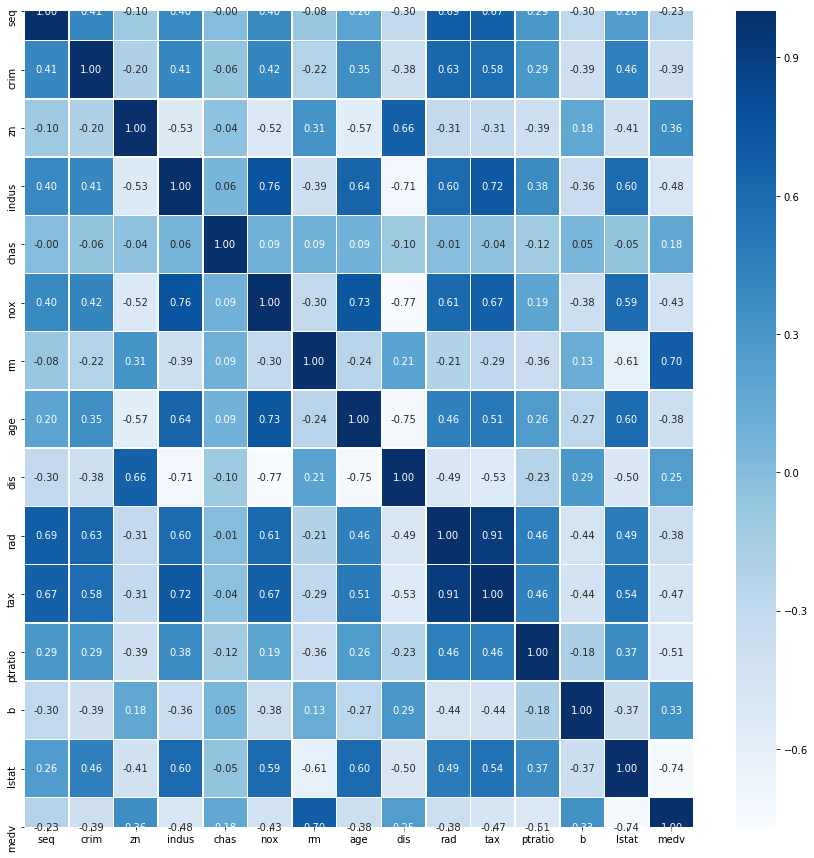

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns  

plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')